In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [2]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img)

In [3]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img)
  axis2.imshow(img2)

In [4]:
model = keras.models.load_model('save/model/model')
model.load_weights('save/poids/model')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[0. 0. 0.]


(1, 600, 800, 3)

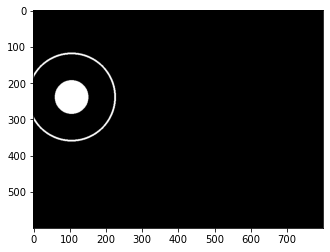

In [5]:
cercleT = tr.createCercle((800,600),True)

img = tf.keras.preprocessing.image.load_img("../../Assets/imgAiTrainer/cercle.png",target_size=(120,160))
img = keras.preprocessing.image.img_to_array(img)
print(img[30][65])
show_sample(img)
imgIa = np.expand_dims(img, axis=0)
imgIa.shape

In [6]:
%%time
y_pred = model.predict(imgIa)

ValueError: in user code:

    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\justin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 256 but received input with shape (None, 4480)


In [7]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2])

NameError: name 'y_pred' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


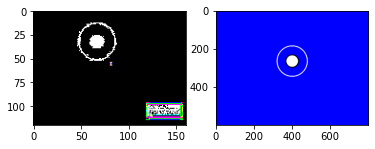

In [16]:
pred=y_pred[0]
imgIA = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(imgIA)
draw.ellipse([round(pred[0]-pred[2]),round(pred[1]-pred[2]),round(pred[0]+pred[2]),round(pred[1]+pred[2])], fill = 'white', outline ='black', width=5)
draw.ellipse([round(pred[0]-pred[3]),round(pred[1]-pred[3]),round(pred[0]+pred[3]),round(pred[1]+pred[3])], fill = None, outline ='white', width=5)
imgPre = tf.keras.preprocessing.image.img_to_array(imgIA, data_format=None, dtype=None)
show_sample2(img,imgPre)